# 첫 번째 머신러닝 모델

- 먼저 머신러닝 모델링 전체 과정 확인
- 사용하는 ML 알고리즘에 대한 상세 내용은 차후에 학습 
- 지금은 전체 과정만 고려 - 머신러닝 프로세스에 익숙해지기 
- 큰 그림을 볼 것

예 : 상품 생산
    - 여러 부품을 사용   
    - 일단 부품들의 내부 원리는 생각하지 않고   
    - 부품을 끼워 맞춰서    
    - 상품을 생산하는 과정만 먼저 확인하자는 것   

## 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

### 첫 번째 머신러닝 모델
- 사용 데이터 세트 : 붓꽃 데이터 세트  
- 데이터 세트 분리 : 학습용 데이터 세트 70%, 테스트용(평가용) 데이터 세트 30%  
- 사용하는 ML 알고리즘 : 의사결정 트리 알고리즘   
- 모델 평가 : 예측 성능 평가 - 정확도   

### 붓꽃 데이터 분류

분류 (Classification)
- 대표적인 지도학습 방법
- 정답을 주고 학습시킨 후 새로운 입력값에 대한 예측 수행
- 학습을 위한 다양한 피처(속성)와 분류 결정값인 레이블(품종) 데이터로 모델을 학습한 후
- 별도의 테스트 데이터 세트에서 레이블(품종) 예측
- 즉, 학습 데이터로 학습한 후, 테스트 데이터의 데이터를 보고 어떤 품종인지 예측하는 것

---
- 학습 데이터 : 학습용 데이터 세트  
- 테스트 데이터 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트  
    - 평가용 데이터 세트 (학습에 사용되지 않은 데이터)

### 사이킷런을 이용한 붓곷 데이터 분류
- 붓꽃 데이터 세트를 이용해서
- 의사결정 트리 알고리즘 기반의 의사결정 트리 분류 모듈 DecisionTreeClassifier를 사용하여  
- 붓꽃의 품종을 분류 (Classification)

### 붓꽃 데이터 세트
- sklearn.datasets에 들어 있음 (내장 데이터 세트)
- load_iris() 통해 로드해서 사용
- 머신러닝 각 분에서 알고리즘을 측정하기 위한 기본 자료로 다양하게 활용
- 4가지 속성(피처)를 가진 3가지 붓꽃 폼종의 각 50개 샘플 포함

### 3가지 붓꽃 품종
- Setosa
- Verisicolor
- Virginica

### 붓꽃의 4가지 속성 (피처 : Feature)
- 꽃받침 길이 : Sepal Length
- 꽃받침 너비 : Sepal Width
- 곷잎의 길이 : Petal Length
- 꽃잎의 너비 : Petal Width

### 용어 정리

- 피처 (Feature) : 데이터 세트 속성(변수/컬럼/열)    
    - feature_names : sepal length, sepal width, petal length, petal width  
        
### 레이블 (Label)
- 품종(setosa, versicolr, virginica)에 대한 결정값 (주어진 정답)
- 타깃값(target) : 예측해야 할 값
- target (숫자) : 0, 1, 2
- target_names : setosa, versicolr, virginica
- 레이블 = 결정값(정답) = 타깃값 = class

## 사이킷런을 이용하여 붓꽃 데이터 품종 예측 예제 

### 붓꽃 데이터 예측 프로세스  
- (1) 데이터 세트 준비 : 붓꽃 데이터 세트  
- (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트    
- (3) 모델 생성 / 학습 / 예측  
   - 모델 생성  
   - 학습 : 학습 데이터 세트 기반으로 ML 알고리즘을 적용하여 모델 학습  
   - 예측 수행 : 학습된 ML 모델을 이용해서, 테스트 데이터의 분류 예측 (즉, 붓꽃 품종 예측)  
- (4) 평가 : 예측 정확도 평가  
	-  예측된 결과값과 테스트 데이터의 실제 결과값과 비교해서 ML 모델 성능 평가

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd

In [4]:
# 사이킷런 버전 확인
# !pip install scikit-learn
import sklearn
print(sklearn.__version__)

1.6.1


### 붓꽃 예측을 위한 사이킷런 필요 모듈 로딩

### 사이킷런 패키지 모듈
* 명명규칙 : 모듈명은 sklearn으로 시작
* sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈 모음
* sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스 모음
* sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나  
    최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모음
    - 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터
        - 머신러닝 알고리즘의 성능 튜닝에 사용


### 붓꽃 데이터 예측 프로세스에서 사용하는 함수 및 클래스
- load_iris() : 붓꽃 데이터 세트
- DecisionTreeClassifier 클래스 : ML 알고리즘에서 사용하는 의사결정 트리 알고리즘
    - 의사결정 트리 분류 모듈 DecisionTreeClassifier 
- train_test_split() : 데이터 세트를 학습 데이터와 테스트 데이터 세트로 분리

### 1) 데이터 세트 준비 : 붓꽃 데이터 세트 로드
- 피처 데이터와 레이블(target) 데이터 준비 

In [5]:
from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split

In [6]:
# 붓꽃 데이터 세트 로딩
iris= load_iris()
iris
# 딕셔너리 형태
# {'data': xxx, 'target':xxx, ..., 'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'],...}

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
# 꽃받침 길이 : Sepal Length
# 꽃받침 너비 : Sepal Width
# 곷잎의 길이 : Petal Length
# 꽃잎의 너비 : Petal Width

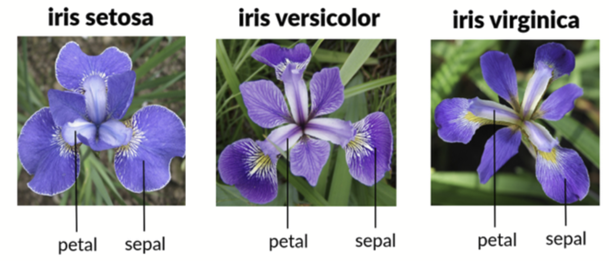

In [17]:
# 데이터 타입 확인
type(iris)

sklearn.utils._bunch.Bunch

In [18]:
# 딕셔너리 형태이므로 key 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 데이터프레임이 아니므로 info() / describe() 사용 못함
# DESCR 키 사용해서 정보 확인

# Number of Instances: 150 (50 in each of three classes)
# Number of Attributes: 4 
# Attribute Information : 
    # sepal length in cm\n
    # sepal width in cm\n
    # petal length in cm\n 
    # petal width in cm\n

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [19]:
iris.feature_names
iris.target_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
# iris.data : iris 데이터 세트에서 피처 데이터 추출
iris_data = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_data.shape
# 피처 데이터 크기 확인
type(iris_data)
iris_data.size

(150, 4)

pandas.core.frame.DataFrame

600

In [36]:
# iris.target : 붓꽃 데이터 세트에서
# 레이블(결정 값) 데이터 (숫자)
# 레이블 = 결정값 = 정답 (품종을 숫자로 표현)
iris_target = pd.DataFrame(iris.target)
iris_target.shape

iris_target[0].unique()
# 0: setosa
# 1: versicolor
# 2 : virginica

type(iris_target)
# 레이블값(target) 크기 확인
iris_target.size


(150, 1)

array([0, 1, 2])

pandas.core.frame.DataFrame

150

In [38]:
# 붓꽃 데이터 DataFrame으로 변환
iris_df.head(3)
iris_target.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


,0
0,0
1,0
2,0


In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트  

### train_test_split() 함수 사용
- train_test_split(피처 데이터 세트, 레이블 데이터 세트, 테스트 데이터 세트 비율, 난수 발생값)
- train_test_split(iris_data, iris_label, test_size=0.3, random_state=11)
- 피처 데이터 세트 : 피처(feature)만으로 된 데이터 [5.1, 3.5, 1.4, 0.2],...
- 레이블 데이터 세트 : 레이블(결정 값) 데이터 [0 0 0 ... 1 1 1 .... 2 2 2]
- 테스트 데이터 세트 비율 : 전체 데이터 세트 중 테스트 데이터 세트 비율 (0.3)
- 난수 발생값 : 수행할 때마다 동일한 데이터 세트로 분리하기 위해 시드값 고정 (실습용)


#### random_state
- 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
- train_test_split() 는 랜덤으로 데이터를 분리하는데 random_state를 설정하지 않으면 
- 수행할 때마다 다른 학습/테스트 데이터 세트가 생성됨
- 따라서 결과값을 동일하게 유지하기 위해 random_state 설정

train_test_split() 반환값 : X_train, X_test, y_train, y_test  
- X_train : 학습용 피처 데이터 세트 (feature)
- X_test : 테스트용 피처 데이터 세트 (feature)
- y_train : 학습용 레이블 데이터 세트 (target)
- y_test : 테스트용 레이블 데이터 세트 (target)
- feature : 대문자 X_
- label(target) : 소문자 y_


In [50]:
# 학습 데이터와 테스트 데이터 세트로 분리
# 변수 4개 (함수 반환값을 받는 변수)
# 변수명 명확하게 사용 : 학습용/테스트용, 피처/레이블
iris_target = iris.target

from sklearn.model_selection import train_test_split
# train_test_split() 함수 사용 : 4개 값 반환 (순서대로 받는다)
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_target, 
                                                    test_size=0.2,
                                                    random_state=11)

In [62]:
# 학습용 피처 데이터 세트 (feature)
X_train.size
X_train.shape
# 테스트용 피처 데이터 세트 (feature)
X_test.size
X_test.shape

480

(120, 4)

120

(30, 4)

In [49]:
# 학습용 / 테스트용 데이터 셋 크기 확인
  # 80%
  # 20%

In [55]:
# 학습용 레이블 데이터 세트 (target)
# 학습용 데이터 세트 정답
y_train
y_train.size  # 80%

# 테스트용 레이블 데이터 세트 (target)
# 테스트용 데이터 세트 정답
y_test
y_test.size # 20%

array([0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1])

120

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

30

### (3) 모델 생성 / 학습 / 예측  
- 모델 생성  
- 학습 : 학습 데이터 세트 기반으로 ML 알고리즘을 적용하여 모델 학습    
- 예측 수행 : 학습된 ML 모델을 이용해서, 테스트 데이터의 분류 예측 (즉, 붓꽃 품종 예측) 

ML 알고리즘으로 의사결정 트리 알고리즘을 이용해서 학습과 예측 수행  
DecisionTreeClassifier 클래스의 fit()/predict() 메소드 사용  

fit() : 학습 수행 (학습용 데이터 사용)  
    - fit(학습용 피처 데이터 세트, 학습용 레이블(정답) 데이터 세트)

predict() : 예측 수행  
    - predict(테스트용 피처 데이터 세트)

In [56]:
# 모델 생성 
# DecisionTreeClassifier 객체 생성
from sklearn.tree import DecisionTreeClassifier
# DecisionTree 알고리즘은 분류조건을 만들기 위해 임의선택(컬럼)을 진행
# >> 난수를 고정하기 위해 random_state=seed값
# 실습을 위해 고정시키지만 실무 모델링시에는 고정하지 않는다.
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 : fit(학습용 피처 데이터, 학습용 레이블 데이터(정답))
# 학습용 데이터 세트로 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [57]:
#예측 수행 : 학습된 ML 모델을 이용해서, 테스트 데이터의 분류 예측 
# - (즉, 붓꽃 품종 예측) 

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이트 세트로 예측 수행
# prdict(테스트용 피처 데이터)
# 예측된 데이터 세트 반환
y_pred = dt_clf.predict(X_test)

In [58]:
# 예측한 데이터 세트 수동 확인 
y_pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [59]:
# 테스트용 레이블(정답)데이터 세트
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [60]:
# 수동으로 결과 비교해서 정확도 계산 

# 실제 데이터 레이블 값과 예측한 값 비교
print(y_pred)
print(y_test)

# 참고
28/30
# 앞으로는 평가 함수 사용 

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


### (4) 평가 : 예측 정확도 평가  
    - 예측된 결과값과 테스트 데이터의 실제 결과값과 비교해서 ML 모델 성능 평가
    - accuracy_score(실제 레이블(정답) 값, 예측한 값) 사용

In [61]:
from sklearn.metrics import accuracy_score
print(f"예측 정확도 : {accuracy_score(y_test,y_pred):.4f}")

예측 정확도 : 0.9333


### 붓꽃 데이터 품족 예측 프로세스 정리   

- (1) 데이터 준비 (데이터 로드 / 데이터 확인) : load_iris() 사용     
- (2) 학습 데이터와 테스트 데이터 세트 분리 : train_test_split() 사용     
- (3) 모델 생성 / 학습 / 예측 : 의사결정트리 알고리즘 사용  
      - 모델 생성  : DecisionTreeClassifier 클래스의 객체 생성  
      - 학습 :  fit(X_train, y_train)  - 학습용 데이터를 사용해서 학습  
      - 예측 수행 : predict(X_test) 사용- 테스트용 피처 데이터 사용해서 예측      
- (4) 예측 정확도 평가 : accuracy_score(y_test, y_pred) 함수 사용      
    - 실제 테스트용 레이블 데이터 세트와 예측된 레이블 데이터 세트 비교 (실제값 vs 예측값)     
    - 예측 정확도 측정 

### iris 데이터 세트로 데이터프레임 생성

In [40]:
### iris 데이터 세트로 데이터프레임 생성
iris = load_iris()
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
# target 값으로 target 열 추가
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [41]:
###################################################################################################

### 추가로 필요한 작업
- 교차 검증
- 하이퍼 파라미터 튜닝

### 현재의 모델
    - 학습과 테스트 데이터 세트만 있고, 검증 데이터 세트를 나누지 않았기 때문에  
    - 일정한 하나의 테스트 데이터 세트로 계속해서 평가를 진행하거나 하나의 학습 데이터 세트로 학습을 진행하면 과적합 발생 
        - 과적합(과대적합) : 학습 데이터를 과하게 학습(overfitting)하는 것 
            - 모델의 성능을 떨어트리는 주요 이슈  
            - 모델이 과적합되면 훈련 데이터에 대한 정확도는 높지만    
            - 새로운 데이터(검증 데이터 또는 테스트 데이터)에 대해서는 제대로 동작하지 않게 됨  
    - 일부 테스트 데이터 세트에서만 좋은 성능을 보였다고 생각할 수 있기 때문에 또 다른 검증 방식 필요 (교차 검증 필요)     

### 교차 검증  
    - 데이터 세트를 학습, 테스트, 검증 데이터 세트로 분리하고   
    - 검증 데이터 세트로 평가  

### 하이퍼 파라미터 튜닝   
    - 튜닝을 통해 모델의 과적합을 방지하고 모델 스코어(모델 평가 지표)를 올릴 수 있기 때문에 필수적인 작업  
    